1. Ennen augmentationia oli vitu hyvä, sen jälkee paska
2. Kuvien kokoa voidaan kasvattaa

In [15]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
import os

%pylab inline
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from pylab import *
import tensorflow as tf


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('always')

Populating the interactive namespace from numpy and matplotlib


C:\Users\koron\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['linalg', 'info', 'power', 'cm', 'random', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [16]:
# Define train/test/validation directories
train_dir = 'Case2_XRay/train'
test_dir = 'Case2_XRay/test'
validation_dir = 'Case2_XRay/validation'

# https://www.hindawi.com/journals/jhe/2019/4180949/
# augmentationit otettu tuolta 

TS = (150, 150) # Image size
BS = 64 # Batch size

tg = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

devg = ImageDataGenerator(rescale=1./255)
testg = ImageDataGenerator(rescale=1./255)

In [3]:
train_generator = tg.flow_from_directory(
    train_dir,
    target_size = TS,
    batch_size = BS,
    class_mode='binary')

dev_generator = devg.flow_from_directory(
    validation_dir,
    target_size = TS,
    batch_size = BS,
    shuffle = False,
    class_mode='binary')

test_generator = devg.flow_from_directory(
    test_dir,
    target_size = TS,
    batch_size = BS,
    shuffle = False,
    class_mode='binary')

Found 3512 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.


In [4]:
i = 0
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    i = i + 1
    if i > 5:
        break

data batch shape: (64, 150, 150, 3)
labels batch shape: (64,)
data batch shape: (64, 150, 150, 3)
labels batch shape: (64,)
data batch shape: (64, 150, 150, 3)
labels batch shape: (64,)
data batch shape: (64, 150, 150, 3)
labels batch shape: (64,)
data batch shape: (64, 150, 150, 3)
labels batch shape: (64,)
data batch shape: (64, 150, 150, 3)
labels batch shape: (64,)


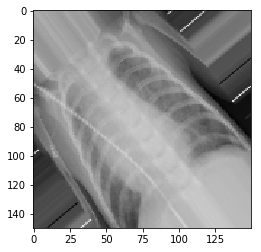

In [5]:
imshow(data_batch[0])
show()

In [6]:
# Construct Model1
# https://www.hindawi.com/journals/jhe/2019/4180949/
network = models.Sequential()
network.add(layers.Conv2D(32, (3,3), activation = 'relu', 
                          padding = "same",input_shape=(150,150,3)))

network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Conv2D(62, (3,3), activation = 'relu'))

network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Conv2D(128, (3,3), activation = 'relu'))

network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Conv2D(128, (3,3), activation = 'relu'))

network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Flatten())

network.add(Dropout(0.5))

network.add(layers.Dense(512, activation = 'relu'))

network.add(layers.Dense(1, activation = 'sigmoid'))

#network.summary()
tf.get_logger().setLevel('INFO') #Hide tensorflow errors, show only iio dnfo

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
import tensorflow as tf

# Define metrics
my_metrics = [tf.keras.metrics.SensitivityAtSpecificity(0.76)]

# Compile model
network.compile(
    optimizer = optimizers.RMSprop(learning_rate=0.001, rho=0.9),
    loss = 'binary_crossentropy',
    metrics= my_metrics)

tf.get_logger().setLevel('INFO') #Hide tensorflow errors, show only info

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

#Save the best weights
filepath="weights5.hdf5"
checkpoint = ModelCheckpoint(filepath,
                            monitor='val_sensitivity_at_specificity_77',  
                            verbose=1, 
                            save_best_only=True, mode='max')

callbacks_list = [checkpoint]

E = 32 # Number of epochs

# Train the model
print('Training ...', end='')
history = network.fit_generator(
    train_generator,
    steps_per_epoch = 30,
    verbose = 1, 
    epochs = E,
    validation_data = dev_generator,
    validation_steps = 40,
    callbacks=callbacks_list)

tf.get_logger().setLevel('INFO') #Hide tensorflow errors, show only info

Training ...Epoch 1/32
30/30 [==============================] - 137s 5s/step - loss: 0.7834 - sensitivity_at_specificity_1: 0.2153 - val_loss: 0.6444 - val_sensitivity_at_specificity_1: 0.2772
Epoch 2/32
30/30 [==============================] - 147s 5s/step - loss: 0.5747 - sensitivity_at_specificity_1: 0.3967 - val_loss: 0.7536 - val_sensitivity_at_specificity_1: 0.1251
Epoch 3/32
30/30 [==============================] - 156s 5s/step - loss: 0.5168 - sensitivity_at_specificity_1: 0.6753 - val_loss: 0.5749 - val_sensitivity_at_specificity_1: 0.5520
Epoch 4/32
30/30 [==============================] - 141s 5s/step - loss: 0.5052 - sensitivity_at_specificity_1: 0.6574 - val_loss: 0.7575 - val_sensitivity_at_specificity_1: 0.1918
Epoch 5/32
30/30 [==============================] - 138s 5s/step - loss: 0.4592 - sensitivity_at_specificity_1: 0.7009 - val_loss: 0.8403 - val_sensitivity_at_specificity_1: 0.3041
Epoch 6/32
30/30 [==============================] - 155s 5s/step - loss: 0.4857 - s

30/30 [==============================] - 156s 5s/step - loss: 0.3196 - sensitivity_at_specificity_1: 0.9006 - val_loss: 0.5398 - val_sensitivity_at_specificity_1: 0.9380
Epoch 23/32
30/30 [==============================] - 151s 5s/step - loss: 0.3166 - sensitivity_at_specificity_1: 0.9050 - val_loss: 0.2482 - val_sensitivity_at_specificity_1: 0.9532
Epoch 24/32
30/30 [==============================] - 161s 5s/step - loss: 0.3319 - sensitivity_at_specificity_1: 0.8866 - val_loss: 0.3093 - val_sensitivity_at_specificity_1: 0.9497
Epoch 25/32
30/30 [==============================] - 169s 6s/step - loss: 0.3132 - sensitivity_at_specificity_1: 0.9210 - val_loss: 0.2966 - val_sensitivity_at_specificity_1: 0.9474
Epoch 26/32
30/30 [==============================] - 157s 5s/step - loss: 0.2792 - sensitivity_at_specificity_1: 0.9280 - val_loss: 0.2421 - val_sensitivity_at_specificity_1: 0.9626
Epoch 27/32
30/30 [==============================] - 153s 5s/step - loss: 0.2767 - sensitivity_at_spec

In [11]:
labels = dev_generator.classes # Outputs from training
predicted = network.predict_generator(dev_generator).flatten()  # Predicted values

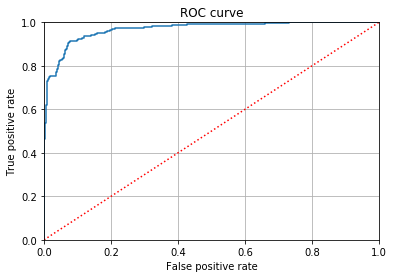

In [12]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(labels, predicted, pos_label = 1)

# Plot ROC curve
plot(fpr, tpr)
plot([0, 1], [0, 1], 'r:')
xlabel('False positive rate')
ylabel('True positive rate')
title('ROC curve')
xlim([0, 1])
ylim([0, 1])
grid()

In [13]:
# Confusion matrix
print('Confusion matrix (machine learning way):')
cm = confusion_matrix(labels, predicted > 0.5)
print(cm)
tn, fp, fn, tp = confusion_matrix(labels, predicted > 0.5).ravel()
print('Confusion matrix (medicine way):')
print(array([[tp, fn], [fp, tn]]))

Confusion matrix (machine learning way):
[[271  46]
 [ 51 804]]
Confusion matrix (medicine way):
[[804  51]
 [ 46 271]]


In [17]:
# Classification report
cr = classification_report(labels, predicted > 0.5, target_names = ['Normal (0)', 'Pneumonia (1)'])
print(cr)

import warnings
warnings.filterwarnings('always')

               precision    recall  f1-score   support

   Normal (0)       0.84      0.85      0.85       317
Pneumonia (1)       0.95      0.94      0.94       855

     accuracy                           0.92      1172
    macro avg       0.89      0.90      0.90      1172
 weighted avg       0.92      0.92      0.92      1172



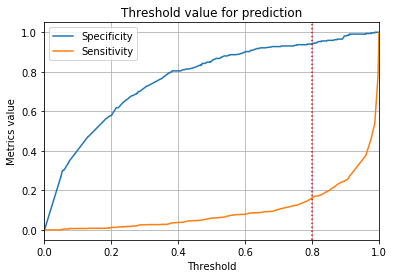

In [18]:
# Threhold analysis
plot(thresholds, 1 -fpr, label = 'Specificity')
plot(thresholds, 1 -tpr, label = 'Sensitivity')
axvline(0.8, color = 'red', linestyle = ':')
xlim([0, 1])
title('Threshold value for prediction')
xlabel('Threshold')
ylabel('Metrics value')
legend()
grid()

In [19]:
# Load best weights
network.load_weights("weights5.hdf5")

OSError: Unable to open file (unable to open file: name = 'weights5.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# Compile model again
network.compile(
    optimizer = optimizers.RMSprop(learning_rate=0.001, rho=0.9),
    loss='binary_crossentropy',
    metrics = my_metrics)

In [ ]:
labels = dev_generator.classes # Outputs from training
predicted = network.predict_generator(test_generator).flatten()  # Predicted values using validation data

In [ ]:
# Calculate ROC curve 
fpr, tpr, thresholds = roc_curve(labels, predicted, pos_label = 1)

# Plot ROC curve
plot(fpr, tpr)
plot([0, 1], [0, 1], 'r:')
xlabel('False positive rate')
ylabel('True positive rate')
title('ROC curve')
xlim([0, 1])
ylim([0, 1])
grid()

In [ ]:
# Classification report
cr = classification_report(labels, predicted > 0.5, target_names = ['Normal (0)', 'Pneumonia (1)'])
print(cr)

In [ ]:
# Confusion matrix
print('Confusion matrix (machine learning way):')
cm = confusion_matrix(labels, predicted > 0.5)
print(cm)
tn, fp, fn, tp = confusion_matrix(labels, predicted > 0.5).ravel()
print('Confusion matrix (medicine way):')
print(array([[tp, fn], [fp, tn]]))

# Conclusions
